In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/joeywilkes/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import os

In [3]:
p = '/Users/joeywilkes/ReservoirComputing/research_data/'
# sorted(os.listdir(p))

In [4]:
f = '0compiled_tarball_output_b12_0.pkl'
df = pd.DataFrame(pickle.load(open(p + f,'rb')))

In [5]:
df['thinned'] = df.remove_p > 0

In [6]:
# fix the no_edges
print(df.loc[(df.net == 'no_edges')]['thinned'])
df.loc[(df.net == 'no_edges'),'thinned'] = True
print(df.loc[(df.net == 'no_edges')]['thinned'])

500      False
501      False
502      False
503      False
504      False
         ...  
23995    False
23996    False
23997    False
23998    False
23999    False
Name: thinned, Length: 2175, dtype: bool
500      True
501      True
502      True
503      True
504      True
         ... 
23995    True
23996    True
23997    True
23998    True
23999    True
Name: thinned, Length: 2175, dtype: bool


In [7]:
l = ['net','thinned']
x = df.groupby(by=l).aggregate(np.mean)
x['mean_pred']

net             thinned
barab1          False      4201.402000
                True       4101.031304
barab2          False      4357.320000
                True       4098.019024
chain           False      3950.880000
                True       4199.792857
erdos           False      4392.780000
                True       4187.836620
geom            False      4128.940000
                True       4206.290500
ident           True       4314.017471
loop            False      3966.925000
                True       4041.922469
no_edges        True       4175.194483
random_digraph  False      4080.350000
                True       4206.737778
watts2          False      4130.750000
                True       4178.032941
watts4          False      4202.870000
                True       4225.653659
Name: mean_pred, dtype: float64

In [8]:
df.columns

Index(['mean_pred', 'mean_err', 'adj_size', 'net', 'topo_p', 'gamma', 'sigma',
       'spect_rad', 'ridge_alpha', 'remove_p', 'pred', 'err', 'max_scc',
       'max_wcc', 'giant_comp', 'singletons', 'nwcc', 'nscc', 'cluster',
       'assort', 'diam', 'exp_num', 'thinned'],
      dtype='object')

In [9]:
x.reset_index(inplace=True) #this is the magic

In [10]:
show = ['net','thinned','mean_pred']
x[show]

,net,thinned,mean_pred
0,barab1,False,4201.402000
1,barab1,True,4101.031304
2,barab2,False,4357.320000
3,barab2,True,4098.019024
4,chain,False,3950.880000
5,chain,True,4199.792857
6,erdos,False,4392.780000
7,erdos,True,4187.836620
8,geom,False,4128.940000
9,geom,True,4206.290500


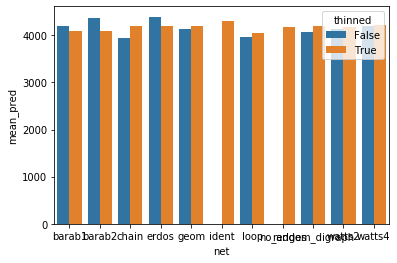

In [11]:
sns.barplot(x='net',y='mean_pred',hue='thinned',data=x[show])

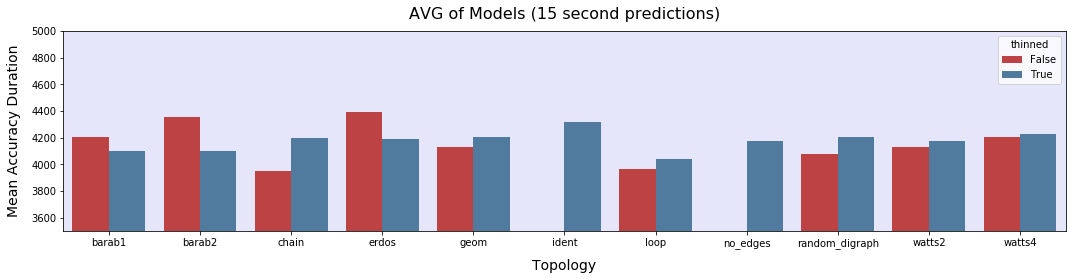

In [30]:

width = 15 #the x
height = 4 #the y 
plt.figure(figsize=(width,height))
#https://github.com/mwaskom/seaborn/issues/720 #where I got the idea
ax = sns.barplot(x='net',y='mean_pred',data=x,hue='thinned',palette="Set1",saturation=0.6)
# ax = sns.barplot(x='net',y='mean_pred',data=x,hue='thinned',palette="winter",saturation=0.6)
# handles, _ = ax.get_legend_handles_labels()
# ax.legend(handles, ["Not Thinned", "Thinned"],bbox_to_anchor=(1.1,1.02))
plt.title('AVG of Models (15 second predictions)',y=1.03,fontsize=16)
plt.ylabel('Mean Accuracy Duration',labelpad=10,fontsize=14)
plt.xlabel('Topology',labelpad=10,fontsize=14)
plt.ylim(int(3.5e3),int(5e3))
ax.set_facecolor('lavender') #ivory & beige,xkcd:beige,azure,khaki
plt.tight_layout()

In [13]:
d = {0:'Not Thinned',1:'Thinned'}

In [14]:
print('How many experiments were run per topology? (25 simulations per exp)\n')
r = dict() #r for results
counter = 0
for n in df.net.unique():
    for t in [0,1]:
        #print(n,d[t],df.loc[(df.net == n) & (df.thinned == t)].shape[0] /25)
        counts = df.loc[(df.net == n) & (df.thinned == t)].shape[0] /25
        r[counter] = {'net':n,'thinned':t,'experiment_count':counts}
        counter += 1

How many experiments were run per topology? (25 simulations per exp)



In [15]:
z = pd.DataFrame(r).T

z.loc[z.thinned == 1][['net','experiment_count']].values

array([['random_digraph', 81.0],
       ['chain', 84.0],
       ['watts2', 85.0],
       ['erdos', 71.0],
       ['ident', 87.0],
       ['barab1', 69.0],
       ['loop', 81.0],
       ['watts4', 82.0],
       ['barab2', 82.0],
       ['no_edges', 87.0],
       ['geom', 80.0]], dtype=object)

In [29]:
z.loc[z.thinned == 0]

,net,thinned,experiment_count
0,random_digraph,0,4.0
2,chain,0,2.0
4,watts2,0,4.0
6,erdos,0,16.0
8,ident,0,0.0
10,barab1,0,20.0
12,loop,0,8.0
14,watts4,0,4.0
16,barab2,0,6.0
18,no_edges,0,0.0


In [17]:
z.columns

Index(['net', 'thinned', 'experiment_count'], dtype='object')

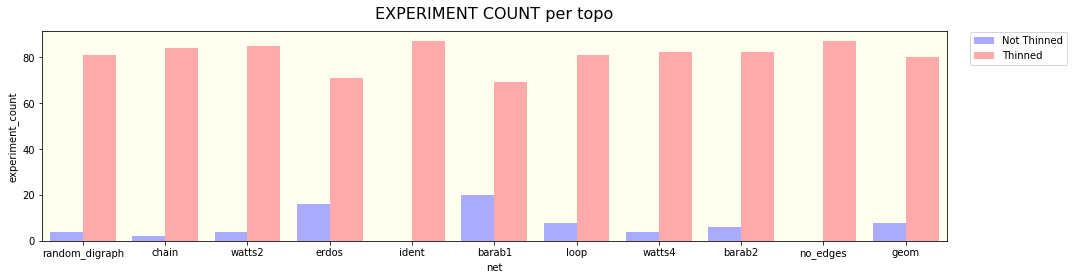

In [18]:

width = 15 #the x
height = 4 #the y 
plt.figure(figsize=(width,height))
#https://github.com/mwaskom/seaborn/issues/720 #where I got the idea
ax = sns.barplot(x='net',y='experiment_count',data=z,hue='thinned',palette="bwr",saturation=1)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["Not Thinned", "Thinned"],bbox_to_anchor=(1.02,1.02))
plt.title('EXPERIMENT COUNT per topo',y=1.03,fontsize=16)
# plt.ylabel('Mean Accuracy Duration',labelpad=10,fontsize=14)
# plt.xlabel('Topology',labelpad=10,fontsize=14)
# plt.ylim(int(3.5e3),int(5e3))
ax.set_facecolor('ivory') #ivory & beige,xkcd:beige,azure,khaki
# ax.legend(loc='best')
plt.tight_layout()

# bookmark
- how to add values above bargraph 
<br>



[graph values](https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart)

/Users/joeywilkes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/joeywilkes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


the actual values for these means can be seen in the cell below
how to add the values to the visual?


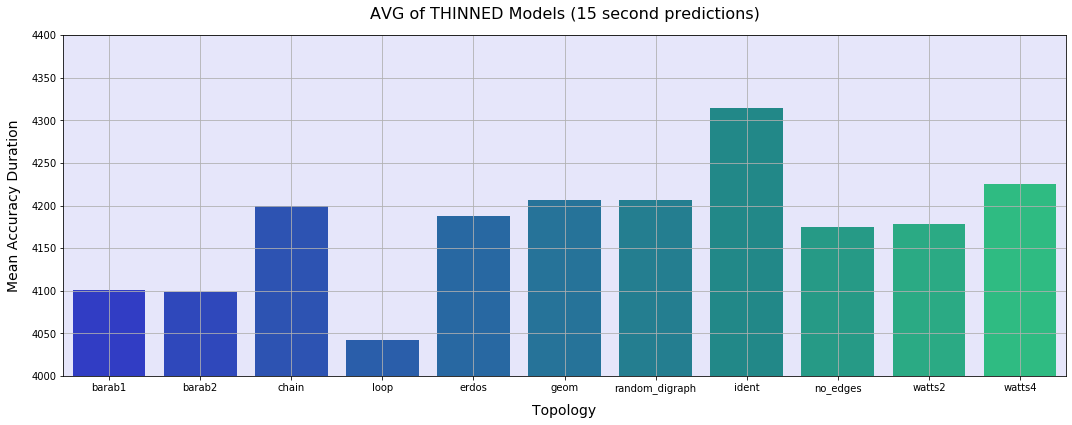

In [19]:
df_thinned = x.loc[x.thinned == 1]
df_thinned['ordering'] = [0, 1, 2, 4, 5, 7, 3, 8, 6, 9, 10]
df_thinned.sort_values(by='ordering',ascending=True,inplace=True)
width = 15 #the x
height = 6 #the y 
plt.figure(figsize=(width,height))
#https://github.com/mwaskom/seaborn/issues/720 #where I got the idea
ax = sns.barplot(x='net',y='mean_pred',data=df_thinned,palette="winter",saturation=0.6)
# handles, _ = ax.get_legend_handles_labels()
# ax.legend(handles, ["Not Thinned", "Thinned"],bbox_to_anchor=(1.1,1.02))
plt.title('AVG of THINNED Models (15 second predictions)',y=1.03,fontsize=16)
plt.ylabel('Mean Accuracy Duration',labelpad=10,fontsize=14)
plt.xlabel('Topology',labelpad=10,fontsize=14)
plt.ylim(int(4e3),int(4.4e3))
ax.grid(True)
ax.set_facecolor('lavender') #ivory & beige,xkcd:beige,azure,khaki
print('the actual values for these means can be seen in the cell below')
print('how to add the values to the visual?')
plt.tight_layout()

In [20]:
df_thinned.net

1             barab1
3             barab2
5              chain
12              loop
7              erdos
9               geom
15    random_digraph
10             ident
13          no_edges
17            watts2
19            watts4
Name: net, dtype: object

In [25]:
df[['net','remove_p']].sample(30)

,net,remove_p
834,erdos,0.96
6894,barab2,0.96
4499,erdos,0.92
19456,ident,0.99
14379,ident,0.90
23086,random_digraph,0.96
10289,geom,0.00
2067,barab1,0.50
12448,chain,0.20
5965,no_edges,0.00


the identity is almost 100 steps further than any other topology <br>
100 / 15000 = 1/150 = 0.006 <br>
is that significant?

In [26]:
print('these are the results of the thinned networks')
df_thinned[['net','mean_pred']]

these are the results of the thinned networks


,net,mean_pred
1,barab1,4101.031304
3,barab2,4098.019024
5,chain,4199.792857
12,loop,4041.922469
7,erdos,4187.836620
9,geom,4206.290500
15,random_digraph,4206.737778
10,ident,4314.017471
13,no_edges,4175.194483
17,watts2,4178.032941


# bookmarks

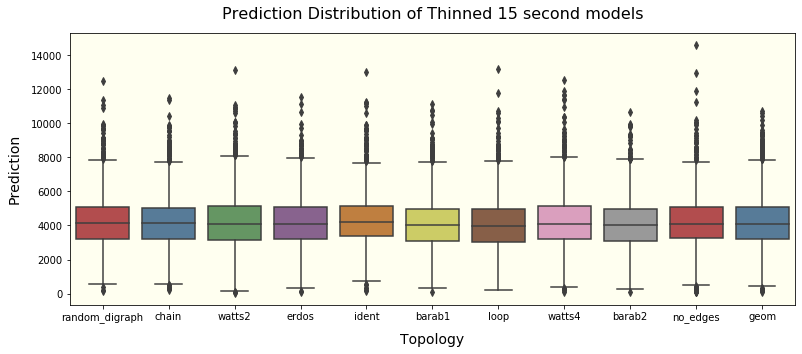

In [27]:
width = 13 #the x
height = 5 #the y 
plt.figure(figsize=(width,height))
#https://github.com/mwaskom/seaborn/issues/720 #where I got the idea
ax = sns.boxplot(x="net", y="mean_pred", data=df.loc[df.thinned == 1],palette="Set1",saturation=0.5)
# handles, _ = ax.get_legend_handles_labels()
# ax.legend(handles, ["Not Thinned", "Thinned"],bbox_to_anchor=(1.01,1.02))
plt.title('Prediction Distribution of Thinned 15 second models',y=1.03,fontsize=16)
plt.xlabel('Topology',labelpad=10,fontsize=14)
plt.ylabel('Prediction',labelpad=10,fontsize=14)
ax.set_facecolor('ivory') #ivory & beige,xkcd:beige,azure,khaki

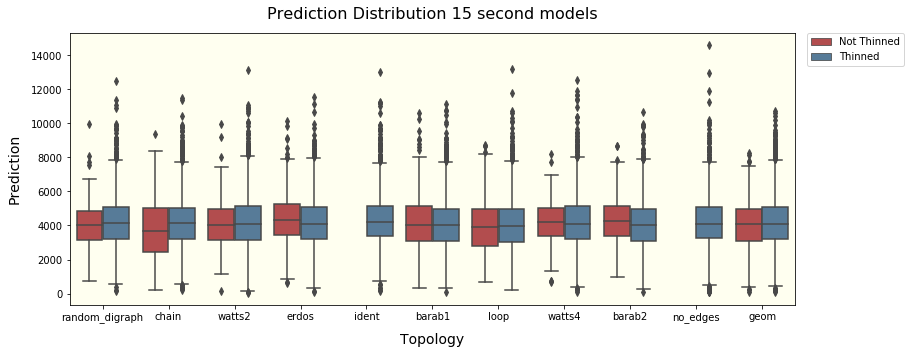

In [28]:
width = 13 #the x
height = 5 #the y 
plt.figure(figsize=(width,height))
#https://github.com/mwaskom/seaborn/issues/720 #where I got the idea
ax = sns.boxplot(x="net", y="mean_pred", hue="thinned", data=df,palette="Set1",saturation=0.5)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["Not Thinned", "Thinned"],bbox_to_anchor=(1.01,1.02))
plt.title('Prediction Distribution 15 second models',y=1.03,fontsize=16)
plt.xlabel('Topology',labelpad=10,fontsize=14)
plt.ylabel('Prediction',labelpad=10,fontsize=14)
ax.set_facecolor('ivory') #ivory & beige,xkcd:beige,azure,khaki